Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    return pd.read_csv(file)

def exercise_1(df):
    return df.columns

def exercise_2(df, k=5):
    return df.head(k)

def exercise_3(df, k=5):
    return df.sample(n=k)

def exercise_4(df):
    return list(set(df['type']))

def exercise_5(df):
    return df['nameDest'].value_counts().head(10)

def exercise_6(df):
    return df[df['isFraud'] == 1]

def exercise_7(df):
    data = df.groupby('nameOrig')['nameDest'].agg(['nunique'])
    data.sort_values(by=('nunique'), ascending=False, inplace=True)
    return data

In [3]:
df = exercise_0('transactions.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
199995,13,CASH_IN,149024.27,C1446913085,8688.0,157712.27,C476402209,440028.59,321427.51,0,0
199996,13,PAYMENT,71076.01,C1421983410,50291.0,0.00,M855368711,0.00,0.00,0,0
199997,13,CASH_OUT,147125.05,C80624764,0.0,0.00,C747330421,1058502.64,1325544.47,0,0
199998,13,CASH_OUT,97529.67,C595001108,0.0,0.00,C575555170,1921846.97,2019376.64,0,0


In [35]:
# Test exercises here
exercise_7(df)

,nunique
nameOrig,
C745009740,2
C260230637,2
C44568807,2
C1709295811,2
C361604284,1
...,...
C1648185402,1
C1648194899,1
C1648216508,1


Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

High-Risk Transactions:
- `CASH_OUT` and `TRANSFER` transactions have recorded fraudulent activities.
- Although the overall number of fraudulent transactions is low, these types highlight potential risk areas.

Zero Fraud Transactions:
- `PAYMENT`, `CASH_IN`, and `DEBIT` transactions show no fraudulent occurrences, indicating these transaction types might have effective fraud prevention measures or are less targeted by fraudulent activities.

Volume vs. Fraud:
- Despite `CASH_OUT` having a high volume, it has a relatively low number of fraudulent transactions, suggesting that while frequent, the fraud rate is very low (approximately 0.11%).
- `TRANSFER` transactions, although fewer in number, also exhibit a low fraud rate (approximately 0.43%).

Focus for Fraud Prevention:
- Given that fraud is present in `CASH_OUT` and `TRANSFER` transactions, these should be the focus for enhanced fraud detection and prevention strategies.

Potential Anomalies:
- The absence of fraud in `PAYMENT`, `

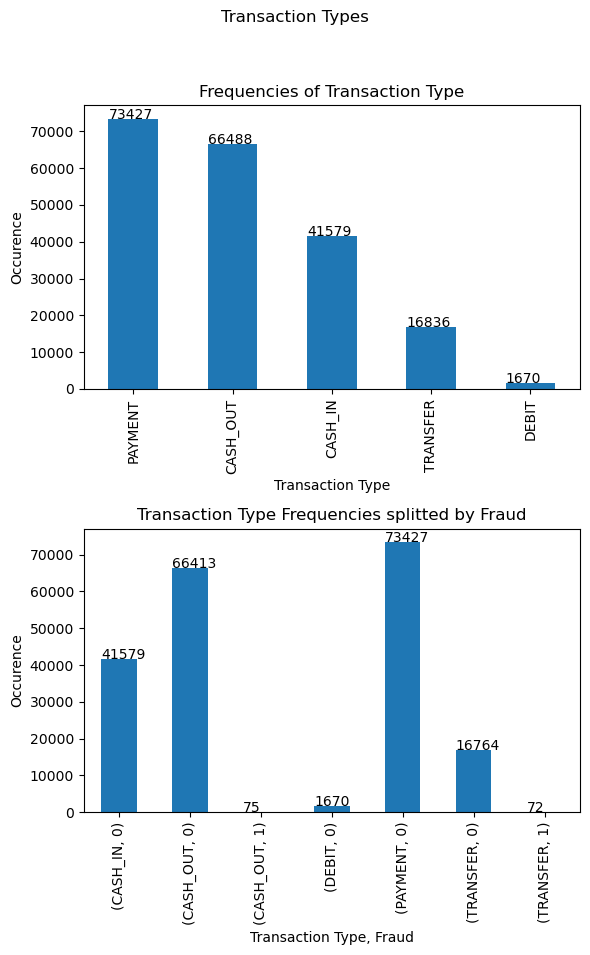

In [39]:
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
    def transaction_counts_split_by_fraud(df):
        return df.groupby(by=['type', 'isFraud']).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Frequencies of Transaction Type')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Occurence')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction Type Frequencies splitted by Fraud')
    axs[1].set_xlabel('Transaction Type, Fraud')
    axs[1].set_ylabel('Occurence')
    fig.suptitle('Transaction Types')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    
    print("High-Risk Transactions:")
    print("- `CASH_OUT` and `TRANSFER` transactions have recorded fraudulent activities.")
    print("- Although the overall number of fraudulent transactions is low, these types highlight potential risk areas.\n")
    print("Zero Fraud Transactions:")
    print("- `PAYMENT`, `CASH_IN`, and `DEBIT` transactions show no fraudulent occurrences, indicating these transaction types might have effective fraud prevention measures or are less targeted by fraudulent activities.\n")
    print("Volume vs. Fraud:")
    print("- Despite `CASH_OUT` having a high volume, it has a relatively low number of fraudulent transactions, suggesting that while frequent, the fraud rate is very low (approximately 0.11%).")
    print("- `TRANSFER` transactions, although fewer in number, also exhibit a low fraud rate (approximately 0.43%).\n")
    print("Focus for Fraud Prevention:")
    print("- Given that fraud is present in `CASH_OUT` and `TRANSFER` transactions, these should be the focus for enhanced fraud detection and prevention strategies.\n")
    print("Potential Anomalies:")
    print("- The absence of fraud in `PAYMENT`, `CASH_IN`, and `DEBIT` might warrant further investigation to ensure that no undetected fraud is present.\n\n")

visual_1(df)

1. A cluster around (0, 0), indicating many transactions with minimal or zero balance changes, likely representing failed or reversed transactions.
2. Numerous points with positive Origin_Delta and zero Destination_Delta, suggesting withdrawals without direct transfers.
3. Some points with negative Destination_Delta and zero Origin_Delta, indicating cash payouts from the destination account.
4. Fewer points with both positive Origin_Delta and Destination_Delta, implying less common direct transfers or variable transaction amounts.
5. Points forming diagonal lines, suggesting direct exchanges between accounts.
6. Values mostly within -1000 to 1000 range, typical for 'CASH_OUT' transactions.
7. Outliers with significantly higher values indicating large transactions.
These observations indicate 'CASH_OUT' transactions primarily involve withdrawals and some direct transfers, with insights into transaction amounts and common patterns.




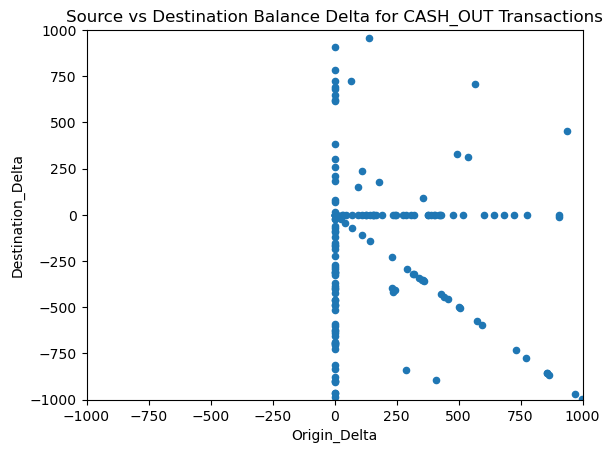

In [40]:
def visual_2(df):
    def query(df):
        df['Origin_Delta'] = df['oldbalanceOrg'] - df['newbalanceOrig']
        df['Destination_Delta'] = df['oldbalanceDest'] - df['newbalanceDest']
        return df[df['type'] == 'CASH_OUT']
    plot = query(df).plot.scatter(x='Origin_Delta',y='Destination_Delta')
    plot.set_title('Source vs Destination Balance Delta for CASH_OUT Transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    
    print("1. A cluster around (0, 0), indicating many transactions with minimal or zero balance changes, likely representing failed or reversed transactions.")
    print("2. Numerous points with positive Origin_Delta and zero Destination_Delta, suggesting withdrawals without direct transfers.")
    print("3. Some points with negative Destination_Delta and zero Origin_Delta, indicating cash payouts from the destination account.")
    print("4. Fewer points with both positive Origin_Delta and Destination_Delta, implying less common direct transfers or variable transaction amounts.")
    print("5. Points forming diagonal lines, suggesting direct exchanges between accounts.")
    print("6. Values mostly within -1000 to 1000 range, typical for 'CASH_OUT' transactions.")
    print("7. Outliers with significantly higher values indicating large transactions.")
    print("These observations indicate 'CASH_OUT' transactions primarily involve withdrawals and some direct transfers, with insights into transaction amounts and common patterns.\n\n")

visual_2(df)

Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

In [ ]:
def exercise_custom(df):
    # TODO
    pass
    
def visual_custom(df):
    # TODO
    pass

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.